<a href="https://colab.research.google.com/github/Vaycold/tensorflow_tutorial/blob/main/%235.%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자동차 연비 예측

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the Data

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 5us/step


'/root/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset =  pd.read_csv(dataset_path, names=column_names,
                           na_values = '?', comment='\t',
                           sep = ' ', skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# 결측값 확인
dataset.isna().sum()
# horsepower : 6

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset = dataset.dropna() # 결측값 제거
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
# Origin column -> to categorical

origin = dataset.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [8]:
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [9]:
# 데이터 분할
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

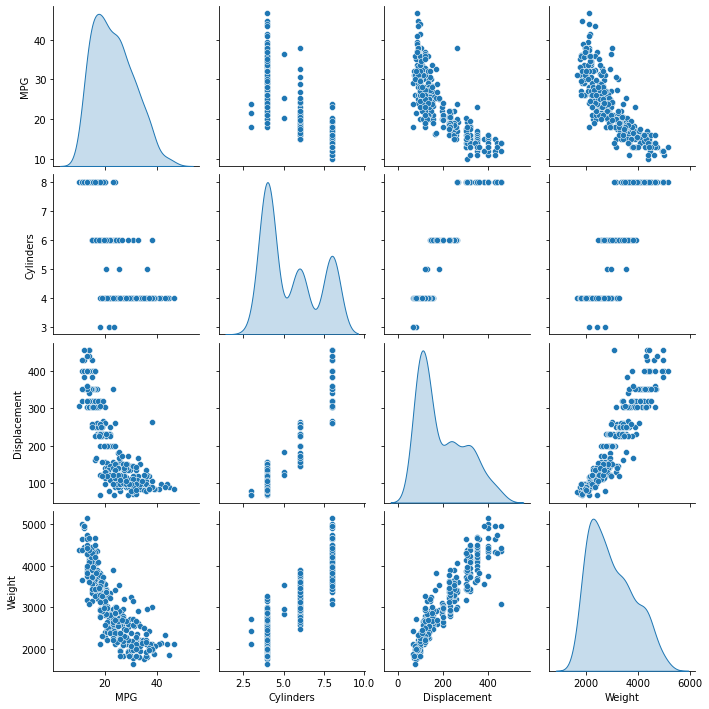

In [10]:
# 산점도 확인
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement','Weight']], diag_kind='kde')


In [11]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [12]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,0,1
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1,0,0
229,16.0,8,400.0,180.0,4220.0,11.1,77,1,0,0
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,0,1
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,0,1


In [13]:
train_dataset.describe().transpose()['mean']

MPG               23.310510
Cylinders          5.477707
Displacement     195.318471
Horsepower       104.869427
Weight          2990.251592
Acceleration      15.559236
Model Year        75.898089
USA                0.624204
Europe             0.178344
Japan              0.197452
Name: mean, dtype: float64

In [14]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [15]:
train_dataset

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1,0,0
229,8,400.0,180.0,4220.0,11.1,77,1,0,0
150,4,108.0,93.0,2391.0,15.5,74,0,0,1
145,4,83.0,61.0,2003.0,19.0,74,0,0,1


In [17]:
train_num = train_dataset[train_dataset.columns[:-3]]
train_cat = train_dataset[train_dataset.columns[-3:]]

test_num = test_dataset[test_dataset.columns[:-3]]
test_cat = test_dataset[test_dataset.columns[-3:]]

In [18]:
# 수치형 데이터 정규화
train_num = (train_num - train_num.describe().transpose()['mean']) / train_num.describe().transpose()['std']
test_num = (test_num - test_num.describe().transpose()['mean']) / test_num.describe().transpose()['std']

test_num

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
9,1.465721,1.870864,2.164711,1.055446,-2.630595,-1.694775
25,1.465721,1.589160,2.785748,1.929831,-0.554574,-1.694775
28,1.465721,1.063312,2.239236,2.063561,1.143989,-1.694775
31,-0.832294,-0.730203,-0.195228,-0.798479,-0.554574,-1.426091
33,0.316714,0.387223,-0.071021,-0.334426,-0.932032,-1.426091
...,...,...,...,...,...,...
369,-0.832294,-0.739594,-0.369119,-0.607600,0.955260,1.529431
375,-0.832294,-0.805325,-0.716899,-1.081940,-0.063878,1.529431
382,-0.832294,-0.777154,-0.816265,-0.779048,0.540056,1.529431
384,-0.832294,-0.936786,-0.890790,-1.099085,0.087106,1.529431


In [19]:
train_dataset = pd.concat(
    [train_num, train_cat], axis=1
)

test_dataset = pd.concat(
    [test_num, test_cat], axis=1
)

In [20]:
train_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,1,0,0
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,1,0,0
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,1,0,0
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,1,0,0
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,0,0,1


In [29]:
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [21]:
test_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,1.465721,1.870864,2.164711,1.055446,-2.630595,-1.694775,1,0,0
25,1.465721,1.589160,2.785748,1.929831,-0.554574,-1.694775,1,0,0
28,1.465721,1.063312,2.239236,2.063561,1.143989,-1.694775,1,0,0
31,-0.832294,-0.730203,-0.195228,-0.798479,-0.554574,-1.426091,0,0,1
33,0.316714,0.387223,-0.071021,-0.334426,-0.932032,-1.426091,1,0,0


## Modeling

In [22]:
keras.models.Sequential

tensorflow.python.keras.engine.sequential.Sequential

In [35]:
def build_model() :
    model = keras.Sequential([
                layers.Dense(64, activation='relu', input_shape = [len(train_dataset.keys())]),
                layers.Dense(64, activation='relu'),
                layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss = 'mse',
                  optimizer = optimizer,
                  metrics = ['mae','mse'])
    return model
model = build_model()

In [36]:
model

In [37]:
model = build_model()

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [39]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.1075906 ],
       [-0.24948218],
       [ 0.10341827],
       [-0.5399911 ],
       [-0.1007169 ],
       [-0.10011934],
       [-0.07159767],
       [ 0.01875485],
       [-0.0128971 ],
       [-0.04624999]], dtype=float32)

In [43]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.460105,1.203596,3.460105,9.728049,2.461588,9.728049,995
996,3.333537,1.225639,3.333537,9.584105,2.403534,9.584105,996
997,3.318282,1.200880,3.318282,9.463568,2.388063,9.463568,997
998,3.329322,1.203917,3.329322,9.986320,2.461287,9.986320,998
999,3.270005,1.195875,3.270005,9.706572,2.390162,9.706572,999


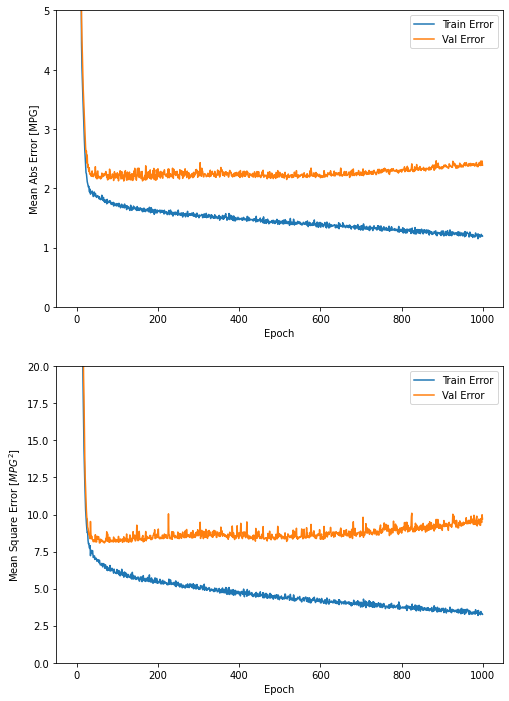

In [45]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


..........................................................................

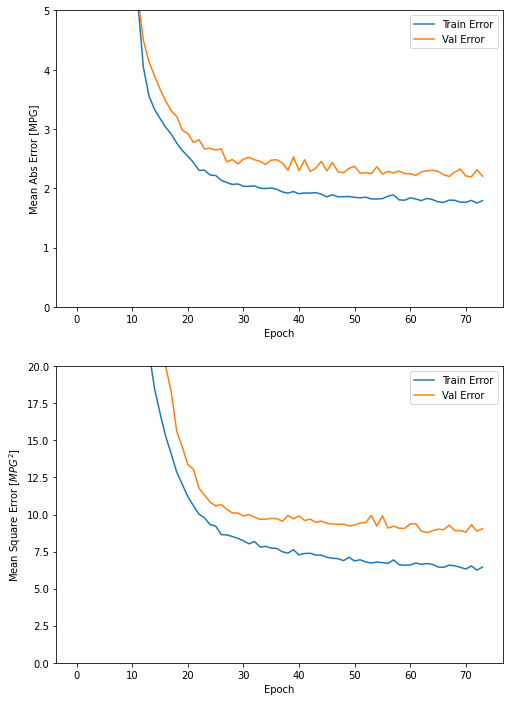

In [46]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [47]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.4174 - mae: 1.9143 - mse: 6.4174
테스트 세트의 평균 절대 오차:  1.91 MPG


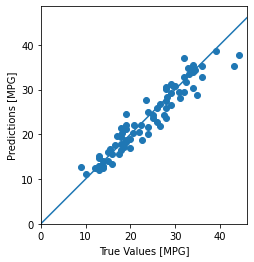

In [48]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

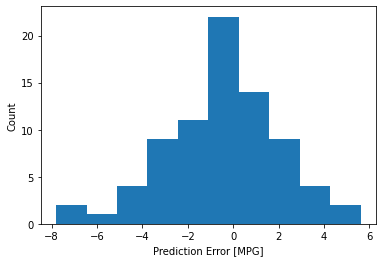

In [50]:
error = test_predictions - test_labels
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")